Çalışma klasörü: C:\Users\Kutlucan Önder\Desktop\veri_gorsellestirme\fao_line
Bu klasördeki dosyalar: ['.ipynb_checkpoints', 'cizgicpt.ipynb', 'wheat-wasted-in-supply-chains.csv']


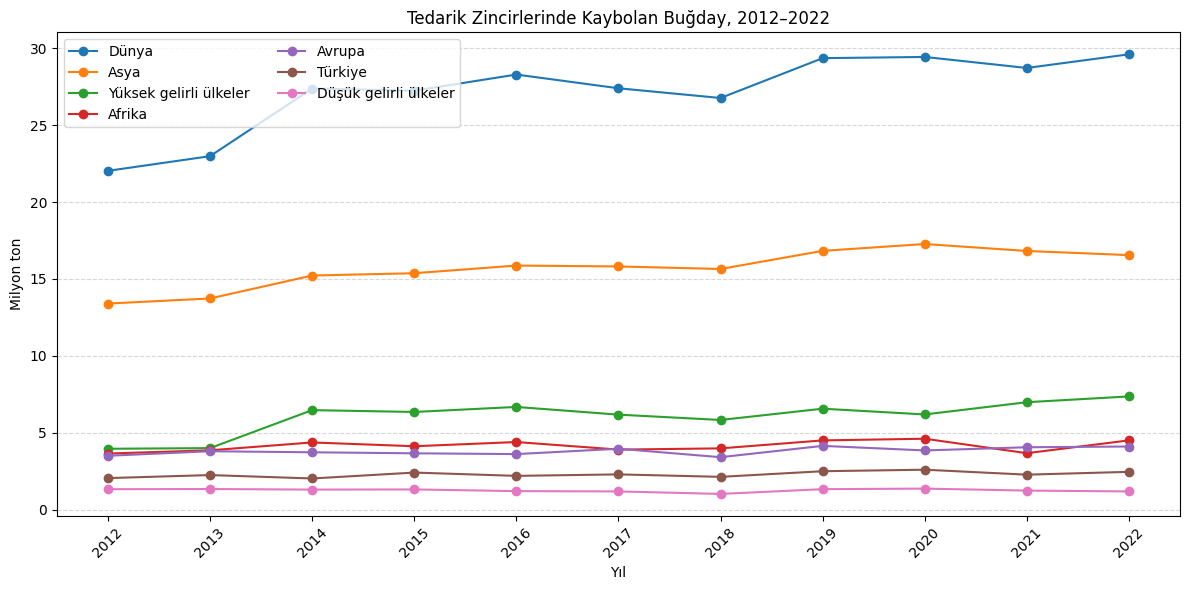

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

print("Çalışma klasörü:", os.getcwd())
print("Bu klasördeki dosyalar:", os.listdir())

df = pd.read_csv('wheat-wasted-in-supply-chains.csv')

uzun_ad = df.columns[2]
df = df.rename(columns={uzun_ad: 'wasted_tonnes'})

df_pivot = df.pivot(index='Year', columns='Entity', values='wasted_tonnes')

df_m = df_pivot / 1e6

labels_tr = {
    'World': 'Dünya',
    'Asia': 'Asya',
    'High-income countries': 'Yüksek gelirli ülkeler',
    'Africa': 'Afrika',
    'Europe': 'Avrupa',
    'Turkey': 'Türkiye',
    'Low-income countries': 'Düşük gelirli ülkeler'
}

plt.figure(figsize=(12, 6))
for eng, tr in labels_tr.items():
    if eng in df_m.columns:
        plt.plot(df_m.index, df_m[eng], marker='o', label=tr)

plt.title('Tedarik Zincirlerinde Kaybolan Buğday, 2012–2022')
plt.xlabel('Yıl')
plt.ylabel('Milyon ton')
plt.xticks(df_m.index, rotation=45)
plt.yticks(range(0, 35, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper left', ncol=2)
plt.tight_layout()
plt.show()